## 1.Problem Statement

私たちのクライアントは、これまで顧客に健康保険を提供してきた保険会社です。

現在、過去1年間に保険に加入していた顧客（契約者）が、同社が提供する自動車保険にも関心を持つかどうかを予測するモデルを構築するための支援を求めています。

保険契約とは、企業があらかじめ定められた損失、損害、病気、死亡などに対して補償を提供することを約束し、顧客がその保証の対価として保険料（プレミアム）を支払うという取り決めです。プレミアムとは、顧客がこの保証を受けるために保険会社に定期的に支払う金額のことを指します。

たとえば、年間 Rs. 5,000 の保険料を支払って Rs. 200,000 の健康保険補償を受けられる保険に加入していたとします。もし万が一その年に病気になって入院が必要になった場合、保険会社は最大で Rs. 200,000 までの入院費用を負担してくれます。
ここで、「たった Rs. 5,000 の保険料でどうしてそんなに高額な費用を保険会社が負担できるのか？」と疑問に思うかもしれません。そこで登場するのが「確率」の考え方です。たとえば、あなたのように Rs. 5,000 の保険料を支払う顧客が100人いたとしても、毎年そのうち実際に入院するのは2～3人程度であり、全員ではありません。つまり、全員でリスクを分担することによって、保険制度は成り立っているのです。

医療保険と同様に、自動車保険というものもあります。これは、顧客が毎年一定の金額のプレミアムを保険会社に支払うことで、万が一自動車事故が発生した場合、保険会社が顧客に対して補償金（「保険金」とも呼ばれます）を支払うという仕組みです。



## 2.ビジネス目標

顧客が自動車保険に興味を持つかどうかを予測するモデルを構築することは、企業にとって非常に有益です。なぜなら、それによって企業はその顧客に向けたコミュニケーション戦略を適切に計画し、ビジネスモデルおよび収益の最適化を図ることができるからです。

現在、この予測を行うために、顧客が自動車保険に興味を持つかどうかを判断するためには、以下の情報が活用されます：
人口統計情報（性別、年齢、地域コード種別）、車両情報（車両の年式、損傷）、**保険契約情報（保険料、チャネル）**など。


## 3.Import Libraries

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
sns.set(style='whitegrid')

Oversampling:少数クラスのデータを水増し（複製・合成）する手法。

RandomOverSampler:少数クラスのサンプルを単純にランダムに複製

## 4.Import Dataset

In [49]:
train=pd.read_csv('./data/train.csv')
test=pd.read_csv('./data/test.csv')

In [50]:
test.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297


In [51]:
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [52]:
train.shape

(381109, 12)

## 5.Check for missing values

<Axes: >

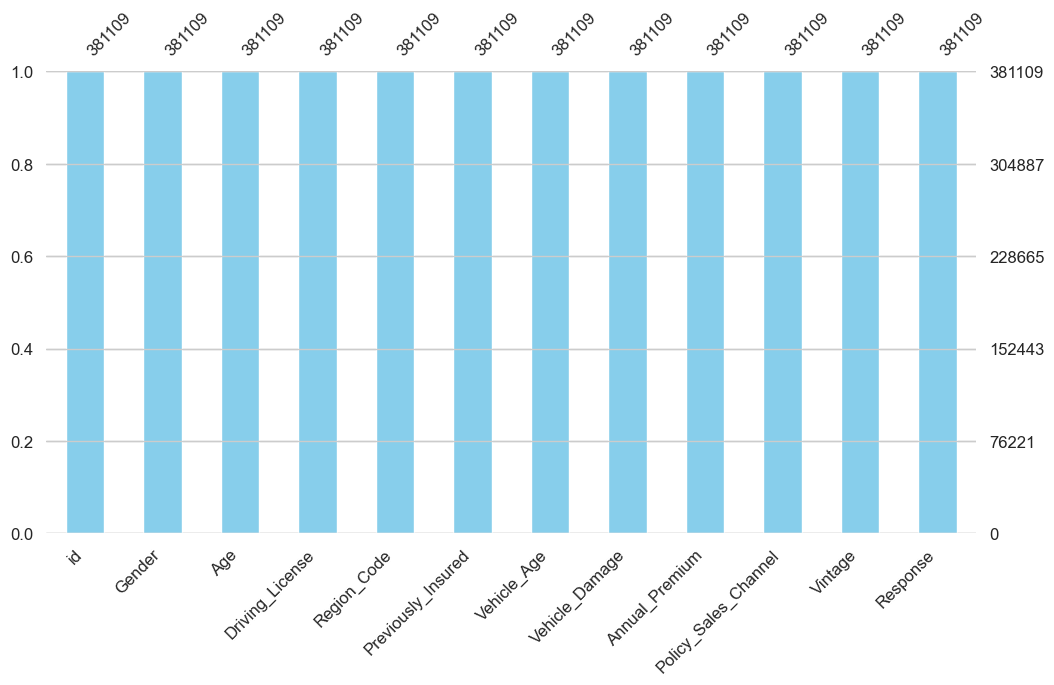

In [53]:
import missingno as msno
import pandas as pd

# 欠損値の棒グラフ（列ごとのNaN数を可視化）
msno.bar(train, figsize=(12, 6), color='skyblue', fontsize=12)


In [54]:
train.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

## 6.EDA

In [55]:
train.dtypes

id                        int64
Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

In [56]:
numerical_columns=['Age', 'Region_Code','Annual_Premium','Vintage']
categorical_columns=['Gender','Driving_License','Previously_Insured','Vehicle_Age','Vehicle_Damage','Response']

In [57]:
train[numerical_columns].describe()

,Age,Region_Code,Annual_Premium,Vintage
count,381109.000000,381109.000000,381109.000000,381109.000000
mean,38.822584,26.388807,30564.389581,154.347397
std,15.511611,13.229888,17213.155057,83.671304
min,20.000000,0.000000,2630.000000,10.000000
25%,25.000000,15.000000,24405.000000,82.000000
50%,36.000000,28.000000,31669.000000,154.000000
75%,49.000000,35.000000,39400.000000,227.000000
max,85.000000,52.000000,540165.000000,299.000000


## 20.Evaluating on Test data

### Catboost

In [58]:
test

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297
...,...,...,...,...,...,...,...,...,...,...,...
127032,508142,Female,26,1,37.0,1,< 1 Year,No,30867.0,152.0,56
127033,508143,Female,38,1,28.0,0,1-2 Year,Yes,28700.0,122.0,165
127034,508144,Male,21,1,46.0,1,< 1 Year,No,29802.0,152.0,74
127035,508145,Male,71,1,28.0,1,1-2 Year,No,62875.0,26.0,265


### LGBM